In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
from bs4 import BeautifulSoup

import warnings 
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [2]:
df = pd.read_csv('train.csv')


In [3]:
new_df = df.sample(40000, random_state= 10)

In [4]:
print(new_df.shape)
new_df.head()

(40000, 6)


,id,qid1,qid2,question1,question2,is_duplicate
108281,108281,177958,177959,How can I get more information on cryptocurrency?,What can you say about kerala Congress's exit?,0
365075,365075,165259,495170,How much does each miner in Gold Rush: Alaska ...,What kind of dog does the Hoffman crew have wi...,0
399424,399424,110838,408590,Can a stock exchange be listed in another stoc...,What is stock exchange and its functions?,0
116651,116651,189968,189969,What is the top speed of the quickest football...,Who are your top 5 best foreign football playe...,0
251097,251097,6403,53276,Is there any way of knowing if a guy is gay?,What are some subtle ways to tell if a guy is ...,1


In [5]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [6]:
# making function for preprocessing dataset

def preprocessing(q):
    
    q = str(q).lower().strip()
    
    # Replacing some numbers with their string (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # changing special characters to written format
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # Decontracting words
    # The dictionary has been taken from the following sources:
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    # Since the pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    
    # Removing the HTML tags using beautifulSoup library
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Removing the punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    return q
    

In [7]:
preprocessing("   mY! stock prices haven't gone up, givig return    of   12% only in a yr.  check out my link: https://en.wikipedia.org/wiki/")

/var/folders/vp/my7m2rnd129g5gytmq92fwdw0000gn/T/ipykernel_3237/599865058.py:165: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


'my  stock prices have not gone up  givig return of 12 percent only in a yr  check out my link  https   en wikipedia org wiki'

In [8]:
new_df['question1'] = new_df['question1'].apply(preprocessing)
new_df['question2'] = new_df['question2'].apply(preprocessing)

/var/folders/vp/my7m2rnd129g5gytmq92fwdw0000gn/T/ipykernel_3237/599865058.py:165: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)
/var/folders/vp/my7m2rnd129g5gytmq92fwdw0000gn/T/ipykernel_3237/599865058.py:165: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [9]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
108281,108281,177958,177959,how can i get more information on cryptocurrency,what can you say about kerala congress s exit,0
365075,365075,165259,495170,how much does each miner in gold rush alaska ...,what kind of dog does the hoffman crew have wi...,0
399424,399424,110838,408590,can a stock exchange be listed in another stoc...,what is stock exchange and its functions,0
116651,116651,189968,189969,what is the top speed of the quickest football...,who are your top 5 best foreign football playe...,0
251097,251097,6403,53276,is there any way of knowing if a guy is gay,what are some subtle ways to tell if a guy is gay,1


In [10]:
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [11]:
new_df['q1_words_len'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_words_len'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [12]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len
108281,108281,177958,177959,how can i get more information on cryptocurrency,what can you say about kerala congress s exit,0,48,45,8,9
365075,365075,165259,495170,how much does each miner in gold rush alaska ...,what kind of dog does the hoffman crew have wi...,0,97,78,21,17
399424,399424,110838,408590,can a stock exchange be listed in another stoc...,what is stock exchange and its functions,0,56,40,10,7
116651,116651,189968,189969,what is the top speed of the quickest football...,who are your top 5 best foreign football playe...,0,54,88,10,16
251097,251097,6403,53276,is there any way of knowing if a guy is gay,what are some subtle ways to tell if a guy is gay,1,43,49,11,12


In [13]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [14]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,word_common
108281,108281,177958,177959,how can i get more information on cryptocurrency,what can you say about kerala congress s exit,0,48,45,8,9,1
365075,365075,165259,495170,how much does each miner in gold rush alaska ...,what kind of dog does the hoffman crew have wi...,0,97,78,21,17,3
399424,399424,110838,408590,can a stock exchange be listed in another stoc...,what is stock exchange and its functions,0,56,40,10,7,2
116651,116651,189968,189969,what is the top speed of the quickest football...,who are your top 5 best foreign football playe...,0,54,88,10,16,4
251097,251097,6403,53276,is there any way of knowing if a guy is gay,what are some subtle ways to tell if a guy is gay,1,43,49,11,12,5


In [15]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [16]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,word_common,word_total
108281,108281,177958,177959,how can i get more information on cryptocurrency,what can you say about kerala congress s exit,0,48,45,8,9,1,17
365075,365075,165259,495170,how much does each miner in gold rush alaska ...,what kind of dog does the hoffman crew have wi...,0,97,78,21,17,3,33
399424,399424,110838,408590,can a stock exchange be listed in another stoc...,what is stock exchange and its functions,0,56,40,10,7,2,15
116651,116651,189968,189969,what is the top speed of the quickest football...,who are your top 5 best foreign football playe...,0,54,88,10,16,4,25
251097,251097,6403,53276,is there any way of knowing if a guy is gay,what are some subtle ways to tell if a guy is gay,1,43,49,11,12,5,22


In [17]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,word_common,word_total,word_share
108281,108281,177958,177959,how can i get more information on cryptocurrency,what can you say about kerala congress s exit,0,48,45,8,9,1,17,0.06
365075,365075,165259,495170,how much does each miner in gold rush alaska ...,what kind of dog does the hoffman crew have wi...,0,97,78,21,17,3,33,0.09
399424,399424,110838,408590,can a stock exchange be listed in another stoc...,what is stock exchange and its functions,0,56,40,10,7,2,15,0.13
116651,116651,189968,189969,what is the top speed of the quickest football...,who are your top 5 best foreign football playe...,0,54,88,10,16,4,25,0.16
251097,251097,6403,53276,is there any way of knowing if a guy is gay,what are some subtle ways to tell if a guy is gay,1,43,49,11,12,5,22,0.23


In [18]:
# adding some advanced features

from nltk.corpus import stopwords

def get_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001 

    stop_words = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Getting the non-stopwords in Questions:
    q1_words = set([word for word in q1_tokens if word not in stop_words])
    q2_words = set([word for word in q2_tokens if word not in stop_words])
    
    #Get the stopwords in Questions:
    q1_stops = set([word for word in q1_tokens if word in stop_words])
    q2_stops = set([word for word in q2_tokens if word in stop_words])
    
    # Getting the common non-stopwords from Question pair:
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Getting the common stopwords from Question pair:
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Geting the common Tokens from Question pair:
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)  # cwc min
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)  # cwc max
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)  # csc min
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)  # csc max 
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)   # ctc min
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)   # ctc miax
    
    # Last word of both question is same or not:
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not:
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features


In [19]:
token_features = new_df.apply(get_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
108281,108281,177958,177959,how can i get more information on cryptocurrency,what can you say about kerala congress s exit,0,48,45,8,9,...,17,0.06,0.000000,0.000000,0.199996,0.199996,0.124998,0.111110,0.0,0.0
365075,365075,165259,495170,how much does each miner in gold rush alaska ...,what kind of dog does the hoffman crew have wi...,0,97,78,21,17,...,33,0.09,0.249997,0.199998,0.166664,0.124998,0.176470,0.157894,0.0,0.0
399424,399424,110838,408590,can a stock exchange be listed in another stoc...,what is stock exchange and its functions,0,56,40,10,7,...,15,0.13,0.666644,0.499988,0.000000,0.000000,0.285710,0.199998,0.0,0.0
116651,116651,189968,189969,what is the top speed of the quickest football...,who are your top 5 best foreign football playe...,0,54,88,10,16,...,25,0.16,0.599988,0.299997,0.249994,0.166664,0.399996,0.249998,0.0,0.0
251097,251097,6403,53276,is there any way of knowing if a guy is gay,what are some subtle ways to tell if a guy is gay,1,43,49,11,12,...,22,0.23,0.499988,0.399992,0.499992,0.428565,0.454541,0.416663,1.0,0.0


In [21]:
# getting length based features
import distance

def get_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features:
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    # Average Token Length of both Questions:
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2
    
    strs = list(distance.lcsubstrings(q1, q2))
    if len(strs) > 0:
        length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features



In [22]:
length_features = new_df.apply(get_length_features, axis=1)

new_df['abs_len_diff']         = list(map(lambda x: x[0], length_features))
new_df['mean_len']             = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [23]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
108281,108281,177958,177959,how can i get more information on cryptocurrency,what can you say about kerala congress s exit,0,48,45,8,9,...,0.000000,0.199996,0.199996,0.124998,0.111110,0.0,0.0,1.0,8.5,0.108696
365075,365075,165259,495170,how much does each miner in gold rush alaska ...,what kind of dog does the hoffman crew have wi...,0,97,78,21,17,...,0.199998,0.166664,0.124998,0.176470,0.157894,0.0,0.0,2.0,18.0,0.126582
399424,399424,110838,408590,can a stock exchange be listed in another stoc...,what is stock exchange and its functions,0,56,40,10,7,...,0.499988,0.000000,0.000000,0.285710,0.199998,0.0,0.0,3.0,8.5,0.390244
116651,116651,189968,189969,what is the top speed of the quickest football...,who are your top 5 best foreign football playe...,0,54,88,10,16,...,0.299997,0.249994,0.166664,0.399996,0.249998,0.0,0.0,6.0,13.0,0.309091
251097,251097,6403,53276,is there any way of knowing if a guy is gay,what are some subtle ways to tell if a guy is gay,1,43,49,11,12,...,0.399992,0.499992,0.428565,0.454541,0.416663,1.0,0.0,1.0,11.5,0.363636


In [24]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def get_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio:
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio:
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio:
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio:
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [25]:
fuzzy_features = new_df.apply(get_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features:
new_df['fuzz_ratio']         = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio']   = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio']    = list(map(lambda x: x[3], fuzzy_features))

In [26]:
print(new_df.shape)
new_df.head()

(40000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
108281,108281,177958,177959,how can i get more information on cryptocurrency,what can you say about kerala congress s exit,0,48,45,8,9,...,0.111110,0.0,0.0,1.0,8.5,0.108696,32,38,28,28
365075,365075,165259,495170,how much does each miner in gold rush alaska ...,what kind of dog does the hoffman crew have wi...,0,97,78,21,17,...,0.157894,0.0,0.0,2.0,18.0,0.126582,32,33,45,44
399424,399424,110838,408590,can a stock exchange be listed in another stoc...,what is stock exchange and its functions,0,56,40,10,7,...,0.199998,0.0,0.0,3.0,8.5,0.390244,50,57,56,64
116651,116651,189968,189969,what is the top speed of the quickest football...,who are your top 5 best foreign football playe...,0,54,88,10,16,...,0.249998,0.0,0.0,6.0,13.0,0.309091,42,56,49,65
251097,251097,6403,53276,is there any way of knowing if a guy is gay,what are some subtle ways to tell if a guy is gay,1,43,49,11,12,...,0.416663,1.0,0.0,1.0,11.5,0.363636,59,63,59,61


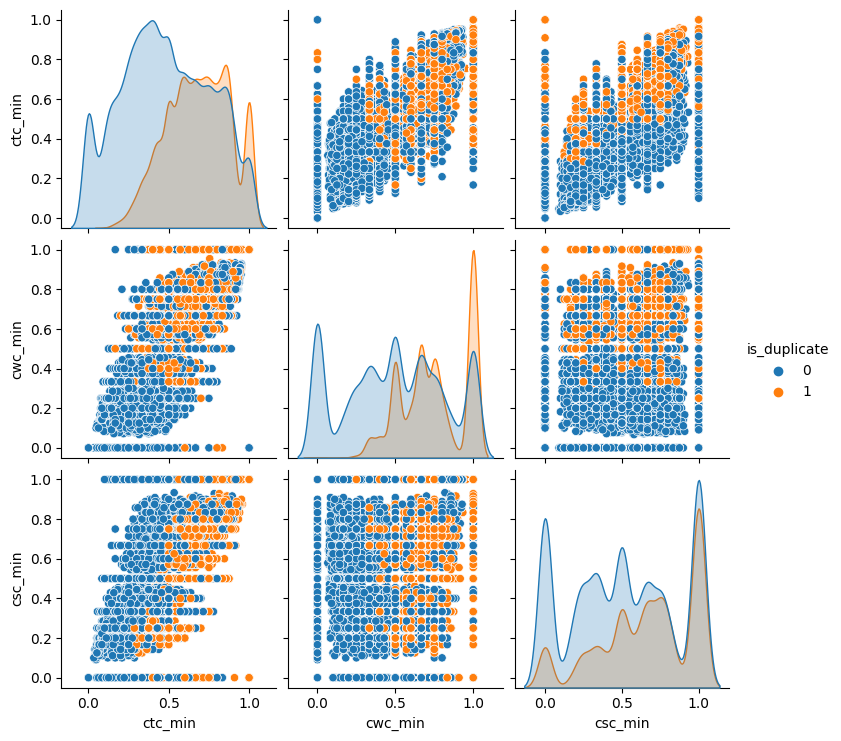

In [27]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

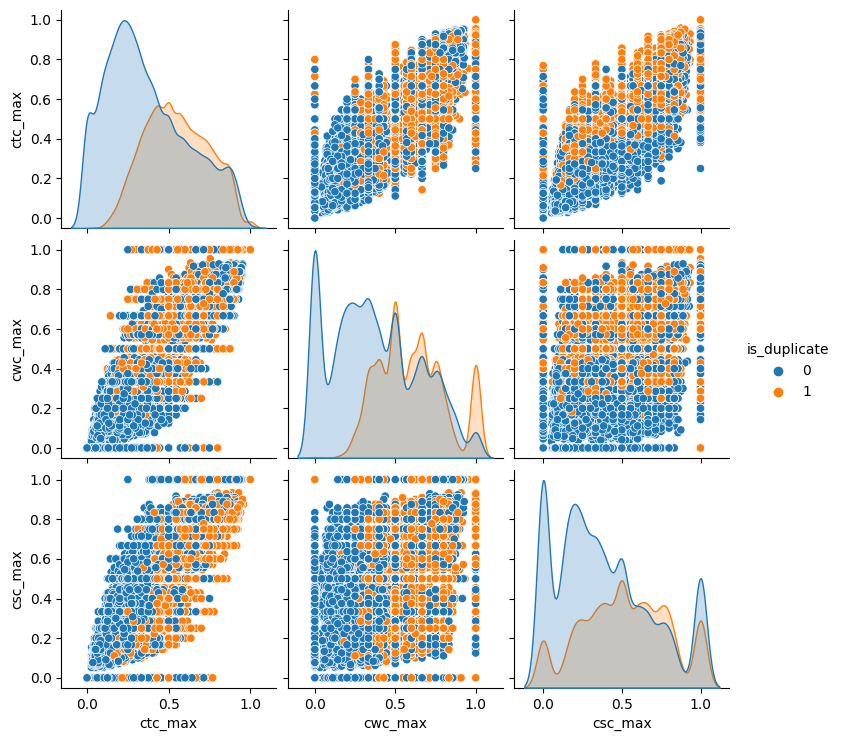

In [28]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

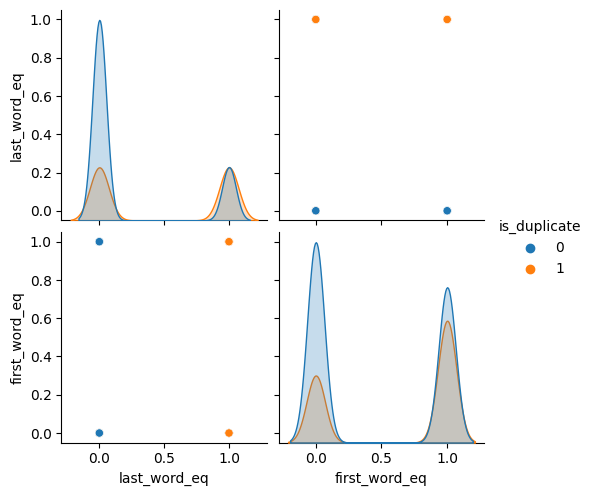

In [29]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

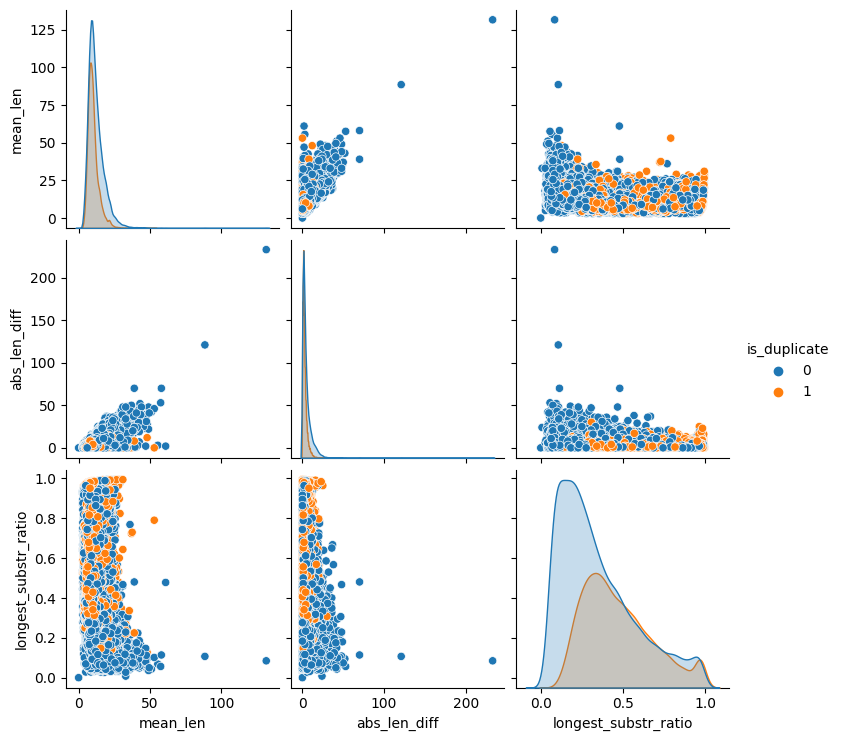

In [30]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')


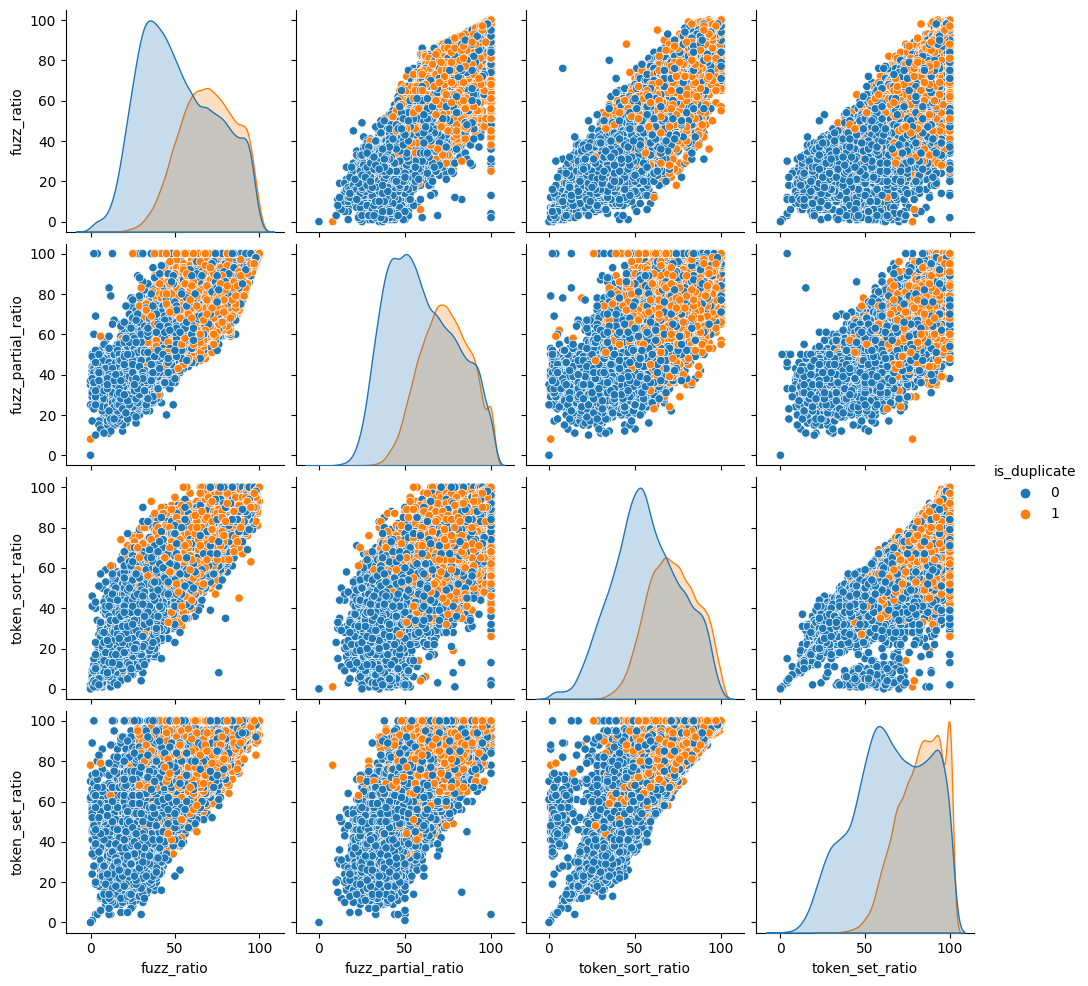

In [31]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

In [32]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [33]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.028s...
[t-SNE] Computed neighbors for 40000 samples in 5.535s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sam

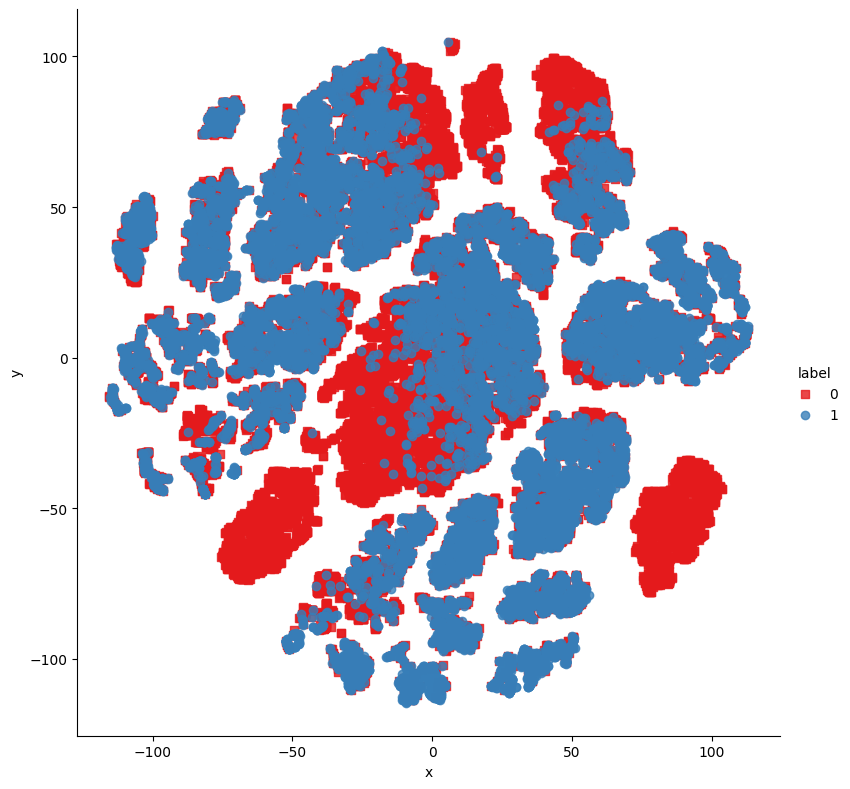

In [34]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, height=8, palette="Set1", markers=['s','o'])

In [35]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 40000 samples in 0.022s...
[t-SNE] Computed neighbors for 40000 samples in 5.570s...
[t-SNE] Computed conditional probabilities for sample 1000 / 40000
[t-SNE] Computed conditional probabilities for sample 2000 / 40000
[t-SNE] Computed conditional probabilities for sample 3000 / 40000
[t-SNE] Computed conditional probabilities for sample 4000 / 40000
[t-SNE] Computed conditional probabilities for sample 5000 / 40000
[t-SNE] Computed conditional probabilities for sample 6000 / 40000
[t-SNE] Computed conditional probabilities for sample 7000 / 40000
[t-SNE] Computed conditional probabilities for sample 8000 / 40000
[t-SNE] Computed conditional probabilities for sample 9000 / 40000
[t-SNE] Computed conditional probabilities for sample 10000 / 40000
[t-SNE] Computed conditional probabilities for sample 11000 / 40000
[t-SNE] Computed conditional probabilities for sample 12000 / 40000
[t-SNE] Computed conditional probabilities for sam

plot plotly visualisation is left

In [36]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
108281,how can i get more information on cryptocurrency,what can you say about kerala congress s exit
365075,how much does each miner in gold rush alaska ...,what kind of dog does the hoffman crew have wi...
399424,can a stock exchange be listed in another stoc...,what is stock exchange and its functions
116651,what is the top speed of the quickest football...,who are your top 5 best foreign football playe...
251097,is there any way of knowing if a guy is gay,what are some subtle ways to tell if a guy is gay


In [37]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(40000, 23)


,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
108281,0,48,45,8,9,1,17,0.06,0.000000,0.000000,...,0.111110,0.0,0.0,1.0,8.5,0.108696,32,38,28,28
365075,0,97,78,21,17,3,33,0.09,0.249997,0.199998,...,0.157894,0.0,0.0,2.0,18.0,0.126582,32,33,45,44
399424,0,56,40,10,7,2,15,0.13,0.666644,0.499988,...,0.199998,0.0,0.0,3.0,8.5,0.390244,50,57,56,64
116651,0,54,88,10,16,4,25,0.16,0.599988,0.299997,...,0.249998,0.0,0.0,6.0,13.0,0.309091,42,56,49,65
251097,1,43,49,11,12,5,22,0.23,0.499988,0.399992,...,0.416663,1.0,0.0,1.0,11.5,0.363636,59,63,59,61


In [38]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv = CountVectorizer(max_features=2000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [39]:
temp_df1 = pd.DataFrame(q1_arr, index= ques_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= ques_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(40000, 4000)

In [40]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(40000, 4023)


,is_duplicate,q1_len,q2_len,q1_words_len,q2_words_len,word_common,word_total,word_share,cwc_min,cwc_max,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
108281,0,48,45,8,9,1,17,0.06,0.000000,0.000000,...,0,0,0,1,0,0,0,0,0,0
365075,0,97,78,21,17,3,33,0.09,0.249997,0.199998,...,0,0,0,0,0,0,0,0,0,0
399424,0,56,40,10,7,2,15,0.13,0.666644,0.499988,...,0,0,0,0,0,0,0,0,0,0
116651,0,54,88,10,16,4,25,0.16,0.599988,0.299997,...,0,0,0,0,0,1,0,0,0,0
251097,1,43,49,11,12,5,22,0.23,0.499988,0.399992,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# splitting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [42]:
# taking out randomforest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.783125

In [43]:
#plotting the confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test,y_pred)

array([[4328,  752],
       [ 983, 1937]])

In [44]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)

0.78525

In [45]:
# plotting the confusion matrix
confusion_matrix(y_test,y_pred1)

array([[4252,  828],
       [ 890, 2030]])

The difference in accuracy of both the models is not that much so we will be choosing the one with less type 1 errors(False Positive) for our app.

Now we will take input from user and deploy our model on heroku

In [46]:
# Function to test common words in both questions 
def test_common_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return len(w1 & w2)

In [47]:
# function to check total words in both question
def test_total_words(q1,q2):
    w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
    return (len(w1) + len(w2))

In [48]:
# Function to get token features from both question
def test_fetch_token_features(q1,q2):
    
    SAFE_DIV = 0.0001 

    STOP_WORDS = stopwords.words("english")
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features

In [49]:
# Function to get length of all features
def test_fetch_length_features(q1,q2):
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [50]:
# Function to get fuzzy features
def test_fetch_fuzzy_features(q1,q2):
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [51]:
def query_point_creator(q1,q2):
    
    input_query = []
    
    # preprocess
    q1 = preprocessing(q1)
    q2 = preprocessing(q2)
    
    # fetch basic features
    input_query.append(len(q1))
    input_query.append(len(q2))
    
    input_query.append(len(q1.split(" ")))
    input_query.append(len(q2.split(" ")))
    
    input_query.append(test_common_words(q1,q2))
    input_query.append(test_total_words(q1,q2))
    input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))
    
    # fetch token features
    token_features = test_fetch_token_features(q1,q2)
    input_query.extend(token_features)
    
    # fetch length based features
    length_features = test_fetch_length_features(q1,q2)
    input_query.extend(length_features)
    
    # fetch fuzzy features
    fuzzy_features = test_fetch_fuzzy_features(q1,q2)
    input_query.extend(fuzzy_features)
    
    # bow feature for q1
    q1_bow = cv.transform([q1]).toarray()
    
    # bow feature for q2
    q2_bow = cv.transform([q2]).toarray()
    
    
    
    return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [54]:
cv

CountVectorizer(max_features=2000)

In [55]:
import pickle

pickle.dump(rf,open('model.pkl','wb'))
pickle.dump(cv,open('cv.pkl','wb'))